# Projekt: Republik

Die Republik schreibe die längsten Artikel der Welt, heisst es. Wie lang sind die Artikel tatsächlich? Wer ist das Zeichenmonster der Redaktion, und hat sich seit der Ankündigung, kürzer werden zu wollen, etwas geändert? Höchste Zeit, das herauszufinden (spätestens bis zum 1-Jahr-Jubiläum). 

## 1. Schritt: Artikel und Links rausfiltern

### 1. Bibliotheken importieren

In [29]:
from bs4 import BeautifulSoup
import pandas as pd

### 2. Republik-Feed importieren

Praktischerweise hat die Republik einen Feed, in dem alle Artikel aufgelistet sind. Statt umständlich via Selenium oder Requests, hab ich die Seite, Tipp von Simon sei Dank, als Html-File gespeichert und dann als Dokument eingelesen.

In [30]:
republik = open('Feed_Republik.htm', 'r')

### 3. Lesbar machen mit BeautifulSoup

In [31]:
soup = BeautifulSoup(republik, 'html.parser')

In [32]:
soup

<!DOCTYPE html>

<!-- saved from url=(0028)https://www.republik.ch/feed -->
<html lang="de"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title class="next-head">Feed – Republik</title><meta class="next-head" content="website" property="og:type"/><meta class="next-head" content="Feed" property="og:title"/><meta class="next-head" content="https://cdn.republik.space/frontend/static/social-media/logo.png" property="og:image"/><meta class="next-head" content="summary_large_image" name="twitter:card"/><meta class="next-head" content="@RepublikMagazin" name="twitter:site"/><meta class="next-head" content="@RepublikMagazin" name="twitter:creator"/><meta class="next-head" content="Feed" name="twitter:title"/><meta class="next-head" content="https://cdn.republik.space/frontend/static/social-media/logo.png?resize=3000x" name="twitter:image:src"/><link as="script" href="./Feed – Republik_neu_files/feed.js" rel="preload"/><link as="script" href="./Feed – Republik_neu_f

### 4. Titel, Links, Leads, Texte ausfiltern

Nach laaaanger Suche habe ich endlich geschnallt: Die Republik-Seite ist tageweise strukturiert, jeweils mit 'section'.

In [33]:
feed = soup.find_all('section')

In [34]:
feed

[<section><div data-css-1sr3gvd=""><div data-css-ghieyj="" style="position: relative; width: 120px;">Samstag,
 17.11.2018</div></div><div data-css-1vcqcuq="" style="border-color:#000000"><p data-css-bb7m24="" style="color:#000000"><a data-css-ugjf8l="" href="https://www.republik.ch/format/wochenend-newsletter">Wochenend-Newsletter</a></p><h1 data-css-1mjrhwx="" data-css-ubtlvb=""><a data-css-ugjf8l="" href="https://www.republik.ch/2018/11/17/wochenend-newsletter">Aufruf zum Büffeln, eine 2800 Jahre alte Stadt und queere Popmusik</a></h1><p data-css-w0m4y7=""><a data-css-ugjf8l="" href="https://www.republik.ch/2018/11/17/wochenend-newsletter"></a></p><p data-css-jo0cg8=""></p></div><div data-css-1vcqcuq=""><h1 data-css-1mjrhwx="" data-css-1xpha7f=""><a data-css-ugjf8l="" href="https://www.republik.ch/2018/11/17/kuess-mich-an-meinen-geschlechtern">Küss mich an meinen Geschlechtern!</a></h1><p data-css-w0m4y7=""><a data-css-ugjf8l="" href="https://www.republik.ch/2018/11/17/kuess-mich-an-

Der erste «Artikel» des Tages ist jeweils ein Newsletter, der zudem eine Art Kickwort hat. Also erstmal diese rausfiltern, inklusive Titel, Datum, Link. 

In [35]:
#Kickwort Newsletter
kickwort_nl = feed[3].find('a').text
kickwort_nl


'7-Uhr-Newsletter'

In [36]:
#Link Newsletter
link_nl = feed[1].find('a')['href']
link_nl


'https://www.republik.ch/format/7-uhr-newsletter'

In [37]:
#Datum Newsletter
datum_nl = feed[1].find('div').text.replace('\n',' ')
datum_nl


'Freitag, 16.11.2018'

In [38]:
#Titel Newsletter
titel_nl = feed[1].find('h1').text
titel_nl

'Klimawandel, Olivenbäume, Dunkelkammer'

Eigentlich hätte ich nun auch die Titel der Artikel herausfiltern sollen. Aber das kriege ich trotz langer Probiererei nicht hin. Die Titel sind genau wie die Newsletter-Titel nach 'h1' strukturiert, aber es filtert nur die Newsletter heraus. Ich müsste also quasi «eine Stufe tiefer» danach suchen. Aber erstmal das erste DataFrame. 

###  4. Erstes DataFrame erstellen mit Datum, Titel, Link

In [39]:
republik_newsletter_liste = []

for element in feed: 
    
    titel_nl = element.find('h1').text
    link_nl = element.find('a')['href']
    datum_nl = element.find('div').text.replace('\n',' ')
    kickwort_nl = element.find('a').text
        
    dict = {'Titel Newsletter': titel_nl,
           'Link Newsletter': link_nl,
           'Datum': datum_nl,
           'Kickwort Newsletter': kickwort_nl}
    
        
    republik_newsletter_liste.append(dict)
    
    

In [40]:
erste_artikelliste = pd.DataFrame(republik_newsletter_liste)
erste_artikelliste.head()

,Datum,Kickwort Newsletter,Link Newsletter,Titel Newsletter
0,"Samstag, 17.11.2018",Wochenend-Newsletter,https://www.republik.ch/format/wochenend-newsl...,"Aufruf zum Büffeln, eine 2800 Jahre alte Stadt..."
1,"Freitag, 16.11.2018",7-Uhr-Newsletter,https://www.republik.ch/format/7-uhr-newsletter,"Klimawandel, Olivenbäume, Dunkelkammer"
2,"Donnerstag, 15.11.2018",Feuilleton-Newsletter,https://www.republik.ch/format/feuilleton-news...,"Stimme als Zaubermedium, ein Gespräch zum Völk..."
3,"Mittwoch, 14.11.2018",7-Uhr-Newsletter,https://www.republik.ch/format/7-uhr-newsletter,"Ein Klangmagier, Drogen & Justiz, die Misere d..."
4,"Dienstag, 13.11.2018",7-Uhr-Newsletter,https://www.republik.ch/format/7-uhr-newsletter,"Ein «Hexenjäger», eine erstaunliche Stadt und ..."


### 5. Zweites DataFrame erstellen mit Titeln und Links

So, ein zweiter Versuch, zusätzlich zu den Newsletter-Titeln auch die Artikeltitel herauszufiltern. Dazu braucht es, wie mir irgendwann dämmert, einen Loop im Loop. 

In [41]:
# nochmals feed heraussuchen
feed = soup.find_all('section')


#alle Titel im Feed rausfiltern
alle_titel = []

for titel in feed:
    titel = titel.find_all('h1')
    for titel in titel:
        titel = titel.text
        alle_titel.append(titel)


#alle Leads im Feed rausfiltern

alle_links = []

for link in feed:
    link = link.find_all('h1')
    for link in link: 
        link = link.find('a')['href']
        alle_links.append(link)
        
        
        

In [42]:
#Und nun alles in ein kleines DataFrame packen.

alle_titel_leads = []

datum = element.find('div').text.replace('\n',' ')


for titel, link in zip(alle_titel,alle_links):
      
        dict_mini = {'Titel Artikel': titel,
           'Link': link, 
            'Datum': datum}
        
        alle_titel_leads.append(dict_mini)

kleine_artikelliste = pd.DataFrame(alle_titel_leads)
kleine_artikelliste.head(15)


,Datum,Link,Titel Artikel
0,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/17/wochenend-n...,"Aufruf zum Büffeln, eine 2800 Jahre alte Stadt..."
1,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/17/kuess-mich-...,Küss mich an meinen Geschlechtern!
2,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/17/staatsrecht...,Staatsrechtliches Nachsitzen
3,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/17/jerewan-arm...,"Jerewan, Armenien"
4,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/16/7-uhr-newsl...,"Klimawandel, Olivenbäume, Dunkelkammer"
5,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/16/wie-die-pol...,Wie die Politik beim Klimawandel versagt
6,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/16/la-malattia,La malattia
7,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/16/aus-einem-h...,Aus einem Hund wird kein Speck
8,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/16/kalifornien...,"Kalifornien brennt, Seehofer geht fast – und M..."
9,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/15/feuilleton-...,"Stimme als Zaubermedium, ein Gespräch zum Völk..."


## 6. Alles in ein DataFrame zu packen – erster Versuch

In [43]:
republik_komplette_liste = []

for element in feed: 
    
    titel_nl = element.find('h1').text
    
    alle_titel = []
    titel = element.find_all('h1')
    for titel in titel:
        titel = titel.text
        alle_titel.append(titel)
   
    alle_links = []
    link = element.find_all('h1')
    for link in link: 
        link = link.find('a')['href']
        alle_links.append(link)
    
    
    link_nl = element.find('a')['href']
    datum_nl = element.find('div').text.replace('\n',' ')
    kickwort_nl = element.find('a').text
    
    
  
        
    
    #alles in ein Dictionary 
   
        
    dict = {'Titel Newsletter': titel_nl,
           'Link': link_nl,
           'Datum': datum_nl,
           'Kickwort Newsletter': kickwort_nl,
           'Titel Artikel': alle_titel,
           'Link Artikel': alle_links}
    
        
    republik_komplette_liste.append(dict)
    
    

In [44]:
komplette_liste = pd.DataFrame(republik_komplette_liste)
komplette_liste.head()

,Datum,Kickwort Newsletter,Link,Link Artikel,Titel Artikel,Titel Newsletter
0,"Samstag, 17.11.2018",Wochenend-Newsletter,https://www.republik.ch/format/wochenend-newsl...,[https://www.republik.ch/2018/11/17/wochenend-...,"[Aufruf zum Büffeln, eine 2800 Jahre alte Stad...","Aufruf zum Büffeln, eine 2800 Jahre alte Stadt..."
1,"Freitag, 16.11.2018",7-Uhr-Newsletter,https://www.republik.ch/format/7-uhr-newsletter,[https://www.republik.ch/2018/11/16/7-uhr-news...,"[Klimawandel, Olivenbäume, Dunkelkammer, Wie d...","Klimawandel, Olivenbäume, Dunkelkammer"
2,"Donnerstag, 15.11.2018",Feuilleton-Newsletter,https://www.republik.ch/format/feuilleton-news...,[https://www.republik.ch/2018/11/15/feuilleton...,"[Stimme als Zaubermedium, ein Gespräch zum Völ...","Stimme als Zaubermedium, ein Gespräch zum Völk..."
3,"Mittwoch, 14.11.2018",7-Uhr-Newsletter,https://www.republik.ch/format/7-uhr-newsletter,[https://www.republik.ch/2018/11/14/7-uhr-news...,"[Ein Klangmagier, Drogen & Justiz, die Misere ...","Ein Klangmagier, Drogen & Justiz, die Misere d..."
4,"Dienstag, 13.11.2018",7-Uhr-Newsletter,https://www.republik.ch/format/7-uhr-newsletter,[https://www.republik.ch/2018/11/13/7-uhr-news...,"[Ein «Hexenjäger», eine erstaunliche Stadt und...","Ein «Hexenjäger», eine erstaunliche Stadt und ..."


Das Problem ist nun, dass die Artikel nicht schön untereinander aufgelistet werden, sondern als Liste in einer Zeile, also in der Zeile des betreffenden Datums. Hier drum neuer Versuch, mal schauen, obs mit dem Mergen klappt. 

## 6. Alles in ein DataFrame packen – zweiter Versuch


In [45]:
df_neu = pd.merge(kleine_artikelliste, erste_artikelliste, how='outer', on='Datum')
df_neu.head()

,Datum,Link,Titel Artikel,Kickwort Newsletter,Link Newsletter,Titel Newsletter
0,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/17/wochenend-n...,"Aufruf zum Büffeln, eine 2800 Jahre alte Stadt...",Ist die Bank die wahre Täterin?,https://www.republik.ch/2018/01/13/tamil-tiger...,Ist die Bank die wahre Täterin?
1,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/17/kuess-mich-...,Küss mich an meinen Geschlechtern!,Ist die Bank die wahre Täterin?,https://www.republik.ch/2018/01/13/tamil-tiger...,Ist die Bank die wahre Täterin?
2,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/17/staatsrecht...,Staatsrechtliches Nachsitzen,Ist die Bank die wahre Täterin?,https://www.republik.ch/2018/01/13/tamil-tiger...,Ist die Bank die wahre Täterin?
3,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/17/jerewan-arm...,"Jerewan, Armenien",Ist die Bank die wahre Täterin?,https://www.republik.ch/2018/01/13/tamil-tiger...,Ist die Bank die wahre Täterin?
4,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/16/7-uhr-newsl...,"Klimawandel, Olivenbäume, Dunkelkammer",Ist die Bank die wahre Täterin?,https://www.republik.ch/2018/01/13/tamil-tiger...,Ist die Bank die wahre Täterin?


Das hat also nicht geklappt. Warum? Keine Ahnung. Also, dann halt weiter. 

# 2. Schritt : Artikel-Links anwählen und Wörter zählen

In [46]:
#Bibliotheken importieren:

from bs4 import BeautifulSoup
import requests
import pandas as pd


### 1. Linkliste nochmals anzeigen

In [47]:
# Hier nochmals der Link-Loop von oben, zur besseren Lesbarkeit. 
# Zur Erinnerung: In der Variable alle_links sind alle Artikellinks enthalten. 

republik = open('Feed_Republik.htm', 'r')
soup = BeautifulSoup(republik, 'html.parser')

feed = soup.find_all('section')

alle_links = []

for link in feed:
    link = link.find_all('h1')
    for link in link: 
        link = link.find('a')['href']
        alle_links.append(link)


In [48]:
alle_links

['https://www.republik.ch/2018/11/17/wochenend-newsletter',
 'https://www.republik.ch/2018/11/17/kuess-mich-an-meinen-geschlechtern',
 'https://www.republik.ch/2018/11/17/staatsrechtliches-nachsitzen',
 'https://www.republik.ch/2018/11/17/jerewan-armenien',
 'https://www.republik.ch/2018/11/16/7-uhr-newsletter',
 'https://www.republik.ch/2018/11/16/wie-die-politik-beim-klimawandel-versagt',
 'https://www.republik.ch/2018/11/16/la-malattia',
 'https://www.republik.ch/2018/11/16/aus-einem-hund-wird-kein-speck',
 'https://www.republik.ch/2018/11/16/kalifornien-brennt-seehofer-geht-fast-und-macron-fordert-eu-armee',
 'https://www.republik.ch/2018/11/15/feuilleton-newsletter',
 'https://www.republik.ch/2018/11/15/digitaler-ausweis-powered-by-ubs',
 'https://www.republik.ch/2018/11/15/jedes-rechtssystem-hat-blinde-flecken',
 'https://www.republik.ch/2018/11/15/die-besaenftigung-der-welt',
 'https://www.republik.ch/2018/11/15/besaeufnis-auf-spesen-hacken-fuer-den-bund-und-was-fordert-die-juge

### 2. Links einzeln ansteuern und Textlängen rausziehen 
Der Einfachheit halber all inclusive, also Zwischentitel, Lead und sonstiges Gschmois. 

In [271]:
artikel_zeichenzahl = []

for link in alle_links[0:5]:
    r = requests.get(link).text
    soup = BeautifulSoup (r, 'html.parser')
   
    #Titel Artikel
    artikel = soup.find('h1')
   
    #Zeichenzahl Artikel (all inclusive)
    zeichenzahl = soup.find('div').text
    zeichenzahl = len(zeichenzahl)
    
    dict_zeichen = {'Artikel': artikel,'Zeichenzahl': zeichenzahl}
    
    artikel_zeichenzahl.append(dict_zeichen)




In [272]:
zeichenzahl

3786

In [273]:
r = requests.get("https://www.republik.ch/2018/11/08/gerangel-um-moutier-tageswoche-ist-geschichte-und-gehen-der-sp-die-frauen-aus").text
soup = BeautifulSoup (r, 'html.parser')
   
    #Titel Artikel
titel_artikel = soup.find('h1').text
   
    #Zeichenzahl Artikel (all inclusive)
zeichenzahl = soup.find('div').text
#zeichenzahl = len(zeichenzahl)
    
dict_zeichen = {'Artikel': artikel,'Zeichenzahl': zeichenzahl}

In [274]:
zeichenzahl

'AnmeldenSie sind nicht angemeldetE-Mail-AdresseAnmeldenDatenschutz – Fragen – Erste-Hilfe-Abteilung: kontakt@republik.ch.CommunityVerlagTeamVeranstaltungenAngeboteJavaScript ist deaktiviert. Formulare – u. a. die Anmeldung – und interaktive Elemente funktionieren nur wenn Sie JavaScript aktivieren. Anleitung um JavaScript zu aktivieren auf selfhtml.org lesen.Wir sind die Republik und haben das ehrgeizige Ziel, für Sie so etwas wie die Steuererklärung zu werden. Denn unabhängiger Journalismus ist wie die Steuern – ein notwendiges Ärgernis. Wie der US-Republikaner Oliver Wendell Holmes (1841–1935) sagte: «Ich zahle gerne Steuern. Damit kaufe ich mir Zivilisation.»Zivilisation kaufen!SpäterBriefing aus BernGerangel um Moutier, die «Tageswoche» ist Geschichte – und gehen der SP die Frauen aus?Das Wichtigste in Kürze aus dem Bundeshaus (32).Von Dennis Bühler und Elia Blülle, 08.11.2018Reicht einander die Hände, und reicht einander die Hände / Wenn der Feind unserer Unabhängigkeit / Sein Ge

In [275]:
# Für das Format (damit ist die Spitzmarke gemeint, Lösung von Simon):
a_list = soup.find_all("a", attrs={"data-css-ugjf8l": ""})
for a in a_list:
    try:
        if a.attrs['data-css-ugjf8l'] == "":
            text_format = a.text
            print(text_format)
    except:
        None

Briefing aus Bern


In [276]:
# Hier versuche ich, die Spitzmarke auf eine andere Art herauszufiltern. Erst Stelle 12.
spitzmarke = soup.find_all('a', {'data-css-ugjf8l':''})
spitzmarke[12].text

'Briefing aus Bern'

In [277]:
spitzmarke


[<a aria-label="Republik – Magazin" data-css-yl92v3="" href="/"><div data-css-1xc3c1q=""><svg data-css-16yc92l="" viewbox="0 0 925.115 136.781" width="100%"><path d="M721.463 133.73v-4.7l11.6-6.24 2.26-4.6V22.735l-2.26-4.6-11.6-6.238v-4.7h62.818v4.7l-11.6 6.238-2.438 4.6v95.457l2.44 4.6 11.6 6.24v4.7h-62.82zM424.22 136.78c34.81 0 46.53-20.452 46.53-46.696V26.59l2.438-4.6 17.783-10.094v-4.7h-51.005v4.7l17.963 10.095 2.26 4.6v63.132c0 23.71-10.033 34.027-25.08 34.027-15.55 0-24.078-11.403-24.078-34.753l.002-66.262 2.44-4.6 11.6-6.24v-4.7h-62.82v4.7l11.6 6.24 2.26 4.6V89.54c0 33.305 18.02 47.24 48.107 47.24zM715.02 87.195l-28.378 36.894h-23.156V22.733l2.442-4.6 11.597-6.24v-4.7H614.71v4.7l11.6 6.24 2.258 4.6v95.457l-2.26 4.6-11.6 6.24v4.7h98.6l6.415-46.535M309.033 7.208l-.012-.013h-59.817v4.7l11.6 6.238 2.26 4.6v95.458l-2.26 4.6-11.6 6.24v4.7h62.817v-4.7l-11.6-6.24-2.44-4.6V86.456l5.496-4.836 19.513 7.26c21.39-2.392 40.19-19.536 40.19-39.93 0-28.612-22.613-41.47-54.147-41.742zm-3.012 68.0

In [278]:
spitzmarke = soup.find_all('a', {'data-css-ugjf8l':''})

for element in spitzmarke:
    try:
        if element["data-css-ugjf8l"] == "":
            text_spitzmarke = element.text
            print(text_spitzmarke)        
    except:
        None



Briefing aus Bern


In [279]:
spitzmarke = soup.find_all('a', {'data-css-ugjf8l':''})
string = 'data-css-ugjf8l'

#spitzmarke_neu = [element for element in spitzmarke if "data-css-ugjf8l" in element]

for element in spitzmarke:
    try:
        if element[string] == "":
            text_spitzmarke = element.text
            print(text_spitzmarke)        
    except:
        None


Briefing aus Bern


In [282]:
spitzmarke = soup.find_all('a', {'data-css-ugjf8l':''})
string = 'data-css-ugjf8l'

#spitzmarke_neu = [element for element in spitzmarke if "data-css-ugjf8l" in element]

for element in spitzmarke:
    try:
        if string in element:
            text_spitzmarke = element.text
            print(text_spitzmarke)        
    except:
        None


In [129]:
# Hier versuche ich, die Fussnote als Ganzes rauszuziehen 
fussnote = soup.find_all('p', {'data-infobox-text':"true"})
fussnote

[<p data-css-zgn2d2="" data-infobox-text="true">Debatte zum Briefing aus Bern</p>,
 <p data-css-jymffc="" data-infobox-text="true">Wo sollen wir nachhaken? Wie beurteilen Sie unsere Arbeit? <a data-css-1bammlk="" href="/2018/06/13/welche-informationen-wollen-sie-aus-bern/diskussion" title="Welche Informationen wollen Sie aus Bern?">Hier geht es zur Debatte</a>.</p>]

In [80]:
# Hier versuche ich, den Text aus der Fussnote rauszuziehen
fussnote_text = soup.find('section', {'data-css-17r5xbq': ''}).text
fussnote_text

'Briefing aus BernGerangel um Moutier, die «Tageswoche» ist Geschichte – und gehen der SP die Frauen aus?Das Wichtigste in Kürze aus dem Bundeshaus (32).Von Dennis Bühler und Elia Blülle, 08.11.2018'

In [54]:
soup

<!DOCTYPE html>
<html lang="de"><head><meta charset="utf-8" class="next-head"/><title class="next-head">Gerangel um Moutier, die «Tageswoche» ist Geschichte – und gehen der SP die Frauen aus? – Republik</title><meta class="next-head" content="Das Wichtigste in Kürze aus dem Bundeshaus (32)." name="description"/><meta class="next-head" content="website" property="og:type"/><meta class="next-head" content="https://www.republik.ch/2018/11/08/gerangel-um-moutier-tageswoche-ist-geschichte-und-gehen-der-sp-die-frauen-aus" property="og:url"/><meta class="next-head" content="Das Wichtigste in Kürze aus dem Bundeshaus (32)" property="og:title"/><meta class="next-head" content=" " property="og:description"/><meta class="next-head" content="https://cdn.republik.space/s3/republik-assets/github/republik/article-bab-neu/images/72f07430451a7fe77b424093a3d9800824ba4c69.png?size=1204x630" property="og:image"/><meta class="next-head" content="1204" property="og:image:width"/><meta class="next-head" cont

In [265]:
#Für den Text
#div css-xcoadz
artikeltext = soup.find_all("div")
for div in artikeltext:
    try:
        if div.attrs['data-css-xcoadz'] == "":
            print(div.text)
    except:
        None

Wir sind die Republik – ein neues Modell im Schweizer Journalismus. Unser digitales Magazin ist unabhängig: keine Werbung, keine Klick-Wirtschaft, keine Kompromisse in der Qualität. Wollen Sie unabhängigen Journalismus unterstützen, freuen wir uns, Sie an Bord zu sehen.Republik unterstützen!Später
Ladies and GentlemenSprache ist ein Zaubermedium. Aus dem Nichts bringt sie Welten hervor, die in unserer Vorstellung Form annehmen. Im Kopf beginnen wir zu sehen, zu hören, zu riechen, zu schmecken, zu tasten: Diese fünf Sinne vermag die Sprache in ihren Bann zu ziehen – wenn man sie entsprechend einsetzt. Am Donnerstag, hier sei daran erinnert, bringt unser Newsletter jeweils einen Rückblick auf das, was das Republik-Feuilleton in den vergangenen Tagen offerierte. Für den Fall, dass Sie etwas verpasst hätten oder wiederlesen möchten. Oder, zur Abwechslung, hören wollen: Sprache als Stimme.Poesie aus der Dunkelkammer: Melinda Nadj Abonji. Christian NeuenschwanderDie Schriftstellerin Melinda 

In [269]:
#mein eigener Versuch, die Textlänge herauszufiltern

zeichenzahl_dj = soup.find_all('p')
string_dj = 'data-css-r8ml7f'

for element in zeichenzahl_dj:
    try:
        if element[string_dj] == "":
            element = element.text
            print(element) 
    except:
        None

    



In [230]:
zeichenzahl_dj

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

# Tatsächliche Zeichenzahl ermitteln (Text minus Gschmois)

''

# Neues Dictionary erstellen mit Simons Version

In [262]:
finale_liste_neu = []

for link in alle_links[0:10]:
    r = requests.get(link).text
    soup = BeautifulSoup (r, 'html.parser')
   
    #Titel Artikel
    artikel = soup.find('h1')
   
    #Zeichenzahl Artikel (all inclusive)
    zeichenzahl = soup.find('div').text
    zeichenzahl = len(zeichenzahl)
    
    dict_zeichen = {'Artikel': artikel,'Zeichenzahl': zeichenzahl}
    
    artikel_zeichenzahl.append(dict_zeichen)




In [263]:
finale_liste = pd.DataFrame(liste_artikel_zeichenzahl)
finale_liste

,Artikel,Zeichenzahl
0,None,7232
1,"<h1 data-css-4hgwmf="""">Küss mich an meinen Ges...",22535
2,"<h1 data-css-4hgwmf="""">Staatsrechtliches Nachs...",10320
3,"<h1 data-css-4hgwmf="""">Jerewan, Armenien</h1>",1611
4,None,3764


In [43]:
df = finale_liste
df.to_csv('republik_liste.csv')

# 3. Schritt : Nach Längen ordnen, Plot erstellen


### 1. Bibliothek importieren

In [44]:
%matplotlib inline

### 2. CSV-File importieren

In [45]:
pfad = 'republik_liste.csv'

In [46]:
df = pd.read_csv(pfad)

### 3. Sortieren nach Zeichenzahl

In [88]:
#Längste Artikel
df.sort_values('Zeichenzahl', ascending=False).head(20)

,Unnamed: 0,Artikel,Zeichenzahl
846,846,"<h1 data-css-4hgwmf="""">Das Komplott gegen Amer...",93844
602,602,"<h1 data-css-nc2zud="""">Betreuung und Pflege im...",80629
985,985,"<h1 data-css-nc2zud="""">USA-Serie: Was führte z...",78002
70,70,"<h1 data-css-4hgwmf="""">Vom Aufstieg des autori...",73443
379,379,"<h1 data-css-nc2zud="""">Erzählen Sie uns Ihre ...",62522
867,867,"<h1 data-css-nc2zud="""">Welchen Service public ...",62050
1004,1004,"<h1 data-css-4hgwmf="""" style=""color:#fff;font-...",58986
274,274,"<h1 data-css-nc2zud="""">Feedback ans Feuilleton...",57945
1038,1038,"<h1 data-css-4hgwmf="""">Demokratie unter Irrati...",57107
484,484,"<h1 data-css-nc2zud="""">Diskutieren Sie mit Dan...",55185


In [69]:
#Kürzeste Artikel
df.sort_values('Zeichenzahl', ascending=False).tail()


,Unnamed: 0,Artikel,Zeichenzahl
1018,1018,"<h1 data-css-4hgwmf="""">Tokio, Japan</h1>",1483
510,510,"<h1 data-css-4hgwmf="""">Ostermundigen, Schweiz<...",1423
223,223,"<h1 data-css-4hgwmf="""">Albisgüetli, Schweiz</h1>",1421
338,338,"<h1 data-css-4hgwmf="""">Beirut, Libanon</h1>",1416
991,991,"<h1 data-css-4hgwmf="""">Iwaki, Japan</h1>",1398


### 4. Durchschnitt, Max, Min, Median berechnen

In der Artikelliste sind auch Newsletter enthalten, die das Ergebnis verfälschen. Die müssen also zuerst aussortiert werden. 

In [80]:
#Anzahl Newsletter bestimmen
len(republik_newsletter_liste)
#Anzahl Einträge des DataFrames bestimmen
len(df)

#Ich gehe davon aus, dass die Newsletter die kürzesten Artikel sind (Ungenauigkeit nehme ich aktuell in Kauf)

anzahl_artikel = len(df)-len(republik_newsletter_liste)
anzahl_artikel

788

In [81]:
#nur die Top788 aussortieren
df_neu = df.sort_values('Zeichenzahl', ascending=False).head(788)

In [84]:
#Median
df_neu['Zeichenzahl'].median()

11477.0

In [85]:
#Durchschnitt
df_neu['Zeichenzahl'].mean()

14968.25888324873

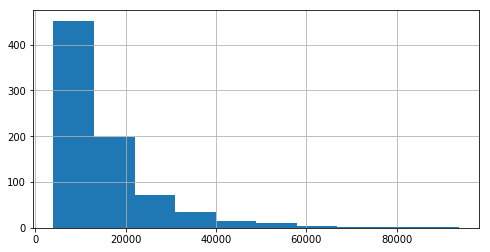

In [86]:
hist = df_neu['Zeichenzahl'].hist(bins=10, figsize=(8,4))

### Fazit: Der durchschnittliche Republik-Artikel ist fast 15 000 Zeichen lang. Der längste fast 100 000 Zeichen, 17 Artikel sind mehr als 50 000 Zeichen lang. 